In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

C:\Users\bcroz\AppData\Local\Temp\ipykernel_14612\1895431338.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
classes = base.classes.keys()
classes

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(measurement.date)).scalar()
most_recent

'2017-08-23'

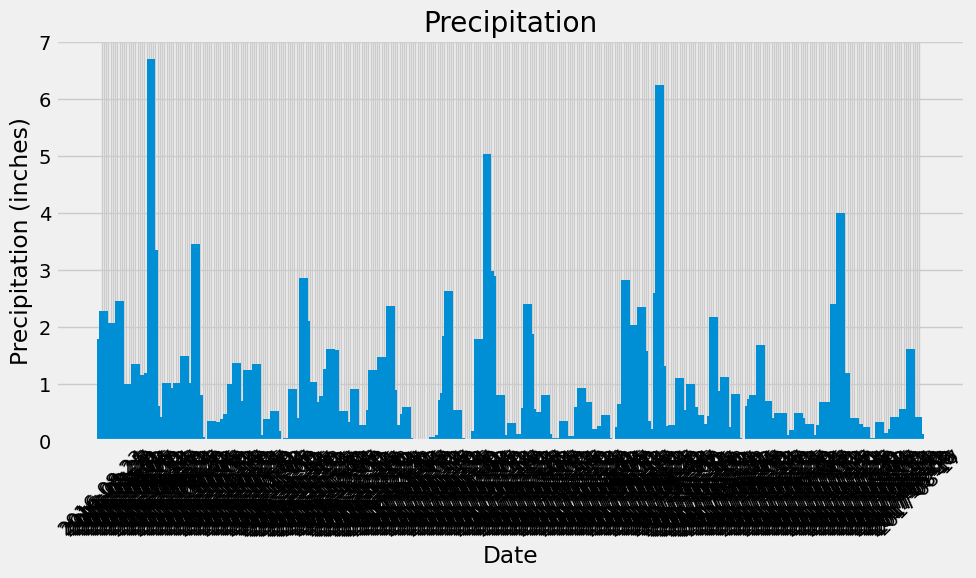

In [22]:
# Calculate the date one year from the most recent date in the dataset.
one_year_ago = pd.to_datetime(most_recent) - pd.DateOffset(days=365)
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago_str).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prec_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Set the index to the date column
prec_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df.index, precipitation_df['Precipitation'], width=4)
plt.title('Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Inches')

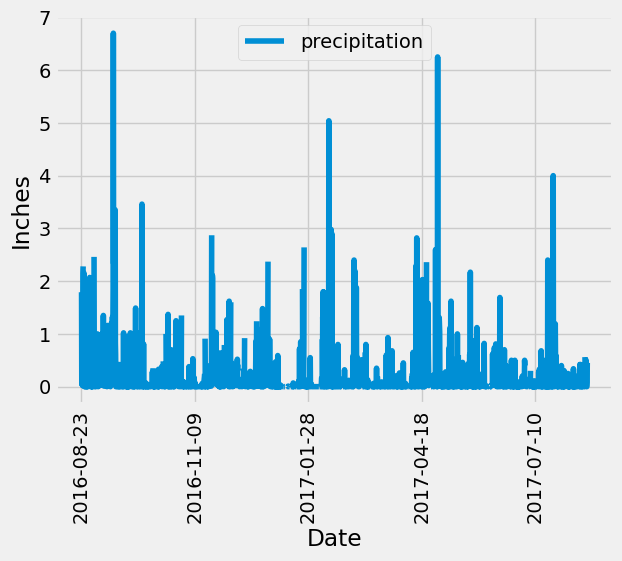

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
stats = prec_df['Precipitation'].describe()
stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [44]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

# Extract the station id
most_active_station_id = most_active[0] if most_active_station else None
most_active_station = most_active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()



temperature_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == ma_id).all()


temperature_stats



[(54.0, 85.0, 71.66378066378067)]

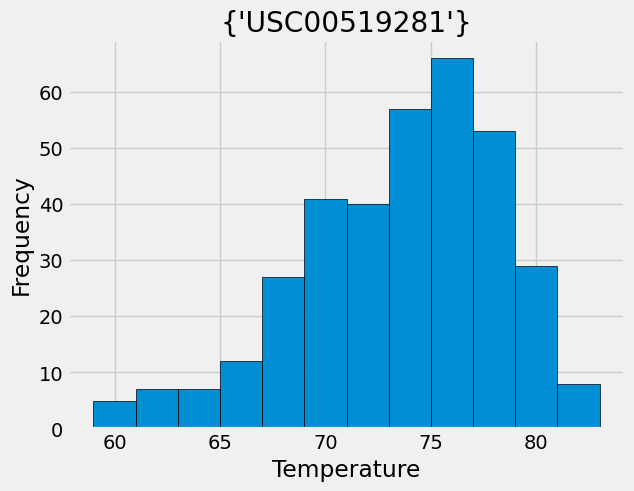

In [58]:
if most_active_station_id:
    # Calculate the date one year from the most recent date in the dataset
    most_recent_date = session.query(func.max(measurement.date)).scalar()
    one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(days=365)
    one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

    # Query the last 12 months of temperature observation data for the most active station
    temperature_data = session.query(measurement.tobs).\
        filter(measurement.station == most_active_station_id).\
        filter(measurement.date >= one_year_ago_str).all()

    # Save the query results as a Pandas DataFrame
    temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

    # Plot the results as a histogram
    plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
    plt.title({most_active_station_id})
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No data found for the most active station.")

# Close Session

In [16]:
# Close Session
session.close()